Explore the incident which produced this scary 13.31% prob and 4 meter estimate

![IMG](1694.png)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import re
import datetime

Let's identify the incident from SOCRATES first

In [2]:
path = '../../data/socrates/'
files = [ (match[0],match[1]) for f in listdir(path) if isfile(join(path, f))  if (match:=re.search('^socrates_([0-9]{14})\.csv(\.gz)?$', f))]
files

# Build single dataset
odf = pd.DataFrame()
for file,date in files:
    tmp_df = pd.read_csv(path + file)
    odf = pd.concat([odf,tmp_df])

In [3]:
socrates = odf.copy()
socrates = socrates.sort_values(by="tca_time", ascending=False)
socrates = socrates[socrates.max_prob != 1]
socrates = socrates[socrates.rel_velo_kms > 0.2]
socrates = socrates[((socrates.sat1_norad == 46544) | (socrates.sat2_norad == 46544))]
socrates['tca_time'] = socrates['tca_time'].astype('datetime64[ns]')
socrates = socrates[(socrates.tca_time > "2021-01-03") & (socrates.tca_time < "2021-01-09")]
socrates

,sat1_norad,sat1_name,sat1_days_epoch,max_prob,dil_thr_km,min_rng_km,rel_velo_kms,sat2_norad,sat2_name,sat2_days_epoch,start_time,tca_time,stop_time,extract_sort,extract_date
2817,45602,XINGYUN-2 01 [+],0.276,4.407000e-07,0.801,2.949,7.981,46544,STARLINK-1694 [+],0.546,2021 Jan 08 03:06:01.281,2021-01-08 03:06:01.787,2021 Jan 08 03:06:02.293,TIMEIN,2021-01-08 08:30:04.237855
953,46544,STARLINK-1694 [+],0.651,1.244000e-05,0.156,0.537,9.392,36042,COSMOS 2251 DEB [-],2.467,2021 Jan 07 21:37:00.885,2021-01-07 21:37:01.414,2021 Jan 07 21:37:01.944,MAXPROB,2021-01-07 20:30:04.203946
1503,46544,STARLINK-1694 [+],0.651,1.244000e-05,0.156,0.537,9.392,36042,COSMOS 2251 DEB [-],2.467,2021 Jan 07 21:37:00.885,2021-01-07 21:37:01.414,2021 Jan 07 21:37:01.944,MINRANGE,2021-01-07 20:30:04.203946
1,46544,STARLINK-1694 [+],0.939,1.331000e-01,0.002,0.004,13.574,37521,COSMOS 2251 DEB [-],8.033,2021 Jan 05 20:32:05.582,2021-01-05 20:32:05.950,2021 Jan 05 20:32:06.319,MAXPROB,2021-01-05 08:30:04.051446
1001,46544,STARLINK-1694 [+],0.939,1.331000e-01,0.002,0.004,13.574,37521,COSMOS 2251 DEB [-],8.033,2021 Jan 05 20:32:05.582,2021-01-05 20:32:05.950,2021 Jan 05 20:32:06.319,MINRANGE,2021-01-05 08:30:04.051446
2703,45074,STARLINK-1172 [+],0.541,2.859000e-07,1.036,3.513,9.679,46544,STARLINK-1694 [+],0.200,2021 Jan 05 02:47:28.271,2021-01-05 02:47:28.639,2021 Jan 05 02:47:29.006,TIMEIN,2021-01-05 08:30:04.051446
2112,45074,STARLINK-1172 [+],0.441,2.407000e-07,1.129,3.828,9.665,46544,STARLINK-1694 [+],0.100,2021 Jan 05 00:24:02.475,2021-01-05 00:24:02.808,2021 Jan 05 00:24:03.141,TIMEIN,2021-01-05 08:30:04.051446
1449,44953,STARLINK-1124 [+],1.794,1.114000e-05,0.182,0.513,12.034,46544,STARLINK-1694 [+],1.075,2021 Jan 04 15:48:36.447,2021-01-04 15:48:36.860,2021 Jan 04 15:48:37.273,MINRANGE,2021-01-03 20:30:04.138171
2851,45407,STARLINK-1275 [+],0.416,5.919000e-07,0.648,2.714,2.529,46544,STARLINK-1694 [+],0.726,2021 Jan 04 15:25:55.045,2021-01-04 15:25:56.706,2021 Jan 04 15:25:58.366,TIMEIN,2021-01-04 20:30:04.155535
2657,45407,STARLINK-1275 [+],0.383,2.495000e-07,0.998,4.180,2.524,46544,STARLINK-1694 [+],0.693,2021 Jan 04 14:38:08.247,2021-01-04 14:38:09.334,2021 Jan 04 14:38:10.420,TIMEIN,2021-01-04 20:30:04.155535


Looks like there were many entries from SOCRATES, but it is rather strange - the TCA time (`2021-01-05 20:32:05.950`) only had 1 distinct entry, meaning that this collision wasn't detected prior or after in any of the `TIMEIN`, `MINRANGE` or `MAXPROB` lists.

The closest TCA time prior and after (filtered between Jan 3 and Jan 9) are not the same incident - they have TCA times that are too long apart as well as different satellites as the other candidate is different..

In [4]:
# all socrates data (only 1 row actually) related to this incident
display(socrates.loc[1])

sat1_norad                              46544
sat1_name                   STARLINK-1694 [+]
sat1_days_epoch                         0.939
max_prob                               0.1331
dil_thr_km                              0.002
min_rng_km                              0.004
rel_velo_kms                           13.574
sat2_norad                              37521
sat2_name                 COSMOS 2251 DEB [-]
sat2_days_epoch                         8.033
start_time           2021 Jan 05 20:32:05.582
tca_time           2021-01-05 20:32:05.950000
stop_time            2021 Jan 05 20:32:06.319
extract_sort                          MAXPROB
extract_date       2021-01-05 08:30:04.051446
Name: 1, dtype: object

In [5]:
#I'm hardcoding these time now since there are only 1 entry for each of them:

extract = socrates.loc[1,"extract_date"] # this was added by Nick, does this have a timezone attached?
tca = socrates.loc[1,"tca_time"]

print(f'extract date: {extract}')
print(f'tca time: {tca}')

extract date: 2021-01-05 08:30:04.051446
tca time: 2021-01-05 20:32:05.950000


In [6]:
df = pd.read_csv("starlink-1694.csv")
df['EPOCH'] = df['EPOCH'].astype('datetime64[ns]')
df = df.drop_duplicates(subset=['EPOCH'])
df = df.set_index("EPOCH")
df.columns
df = df[['OBJECT_NAME', 'OBJECT_ID', 'SEMIMAJOR_AXIS', 'INCLINATION']]

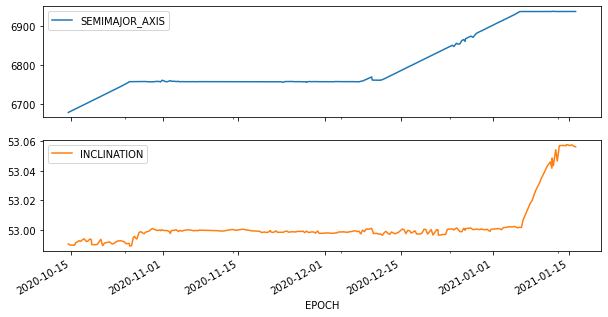

In [7]:
# lets do a quick plot on all TLEs
df.plot(subplots=True,figsize=(10,5));

A little background, the big flat part in the middle with `SEMIMAJOR_AXIS` of 6757 and `INCLINATION` of 53 degrees is the "parking orbit" for Starlinks - a place where they until they reached their required orbital plane before changing orbits into a new one.

From eyeballing the chart above and manually inspecting the data to verify the orbit raising maneuver started 2020-12-07 and ended around 2021-01-05. The inclination change started around 2021-01-06 and ended around 2021-01-13.

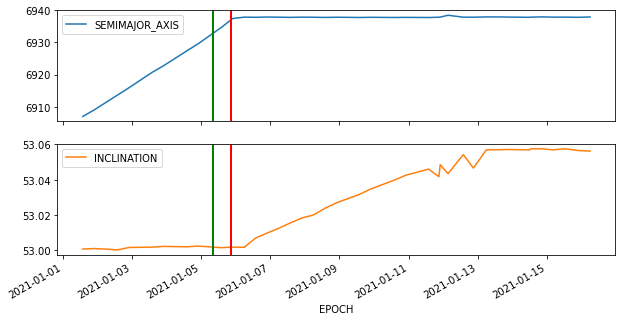

In [8]:
# lets narrow down the time range and add see if we can nail down the exact times
axes=df.loc[df.index > '2021-01-01'].plot(subplots=True,figsize=(10,5))

for a in axes:
    a.axvline(x=extract, lw=2, c="green")
    a.axvline(x=tca, lw=2, c="red")

OK looks like this SOCRATES alert happened right during the orbit change and since there was only 1 of them, I am starting to think if it was one that did not require intervention.  Let's zoom in real close to see.  I will mark down the TLE EPOCH and other extract times for clarity.

,OBJECT_NAME,OBJECT_ID,SEMIMAJOR_AXIS,INCLINATION
EPOCH,,,,
2021-01-04 14:00:01.000224,STARLINK-1694,2020-070N,6927.324,53.0020
2021-01-04 22:00:00.999936,STARLINK-1694,2020-070N,6929.575,53.0024
2021-01-05 14:00:01.999872,STARLINK-1694,2020-070N,6934.629,53.0015
2021-01-05 22:00:00.999936,STARLINK-1694,2020-070N,6937.457,53.0018
2021-01-06 06:00:00.999648,STARLINK-1694,2020-070N,6937.874,53.0017
2021-01-06 14:00:01.999872,STARLINK-1694,2020-070N,6937.834,53.0070
2021-01-06 22:00:00.999936,STARLINK-1694,2020-070N,6937.908,53.0098


TLE times in GREY
Extract times in thick translucent green
Extract date (GREEN): 2021-01-05 08:30:04.051446
TCA time (RED): 2021-01-05 20:32:05.950000


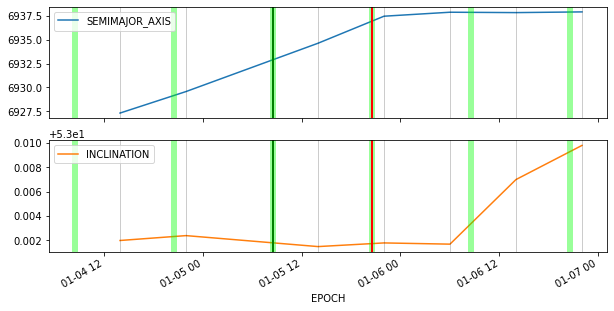

In [9]:
socrates_extract_dates = odf.extract_date.drop_duplicates().astype('datetime64[ns]')
socrates_extract_dates = socrates_extract_dates[(socrates_extract_dates > "2021-01-04") & (socrates_extract_dates < "2021-01-07")]
socrates_extract_dates = socrates_extract_dates.sort_values()

axes=df.loc[(df.index > '2021-01-04') & (df.index < '2021-01-07')].plot(subplots=True,figsize=(10,5))

for a in axes:
    for e in socrates_extract_dates:
        a.axvline(x=e, lw=6, c="#00ff0066")
    for e in df.loc[(df.index > '2021-01-04') & (df.index < '2021-01-07')].index:
        a.axvline(x=e, lw=1, c="#00000033")
    a.axvline(x=extract, lw=2, c="green")
    a.axvline(x=tca, lw=2, c="red")

display(df.loc[(df.index > '2021-01-04') & (df.index < '2021-01-07')])
print('TLE times in GREY')
print('Extract times in thick translucent green')
print(f'Extract date (GREEN): {extract}')
print(f'TCA time (RED): {tca}')

Seems like the TLEs were coming in every 8 hours - how unfortunate it was to have the one prior (`2021-01-05 0600`) to the extract date to be missing!  `sat1_days_epoch` for the event was 0.939, meaning that the TLE from `2021-01-04 22:00:00.999936` was used instead of the missing one.

With only 1 TLE between the extract time and TCA time, and the orbit-raising maneuver ending in the same timeframe as the TCA time, it's really hard to draw any conclusions.

SOCRATES should also have made another prediction prior to next extract date `2021-01-05 2030` but this didn't show up there - presumably because there was no longer a danger of collision that it didn't even show up in the `TIMEIN` list.

### Need clarifications @nick please help answer these if possible

* What exactly is extract_date? I think it's Nick's local computer time.  Do we happen to have stored "Data current as of 2021 Jan 16 08:06 UTC" from SOCRATES? That can give a more accurate "socrates time"
